In [8]:
import django_initialiser
from api.melody_utils.search import search_lcs, search_dtw
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_search = [76, 75, 76, 75, 76, 71, 74, 72, 69, 57, 76, 75, 76, 75, 76, 71, 74, 72, 69, 57, 76, 75, 76, 75, 76, 71, 74, 72, 69, 57, 76, 75, 76, 75, 76, 71, 74, 72, 69, 57]

In [29]:
try:
    f = open('./results.csv', 'a')
    for i in range (22, 41):
        cur_search = input_search[:i]
        lcs = search_lcs(cur_search, return_time=True)
        fast_dtw = search_dtw(cur_search, 0, generate_graphs=False, fast=True, return_time=True)
        dtw = search_dtw(cur_search, 0, generate_graphs=False, fast=False, return_time=True)
        f.write(f'{i},{lcs},{fast_dtw},{dtw}\n')
        print(f'Len {i} done')
    f.close()

except KeyboardInterrupt:
    f.close()
    pass

LCS done in 6.716319800000292 seconds.
DTW done in 11.187695900000108 seconds.
DTW done in 47.02419800000007 seconds.
Len 22 done


    input_len   lcs_time  fast_dtw_time   dtw_time
0           3   1.572753       5.443953   7.007881
1           4   1.590329       6.359001   8.978350
2           5   1.858176       6.247960  12.163868
3           6   2.163489       8.706339  14.194734
4           7   2.434415       7.997551  16.148630
5           8   2.830825       9.426124  17.963917
6           9   2.789170       8.467587  18.645697
7          10   3.082801       9.060609  20.733105
8          11   3.941144       8.725768  25.051976
9          12   4.128322      10.213307  29.246782
10         13   4.303309      11.031813  29.347388
11         14   4.615273      10.509383  32.169285
12         15   4.968261      10.431598  33.577927
13         16   5.386138      11.912047  34.678274
14         17   5.983319      11.250315  37.202873
15         18   5.807657      11.885520  39.300779
16         19   5.952619      11.240329  41.885856
17         20   6.094366      11.506575  41.823452
18         21   6.391854      1

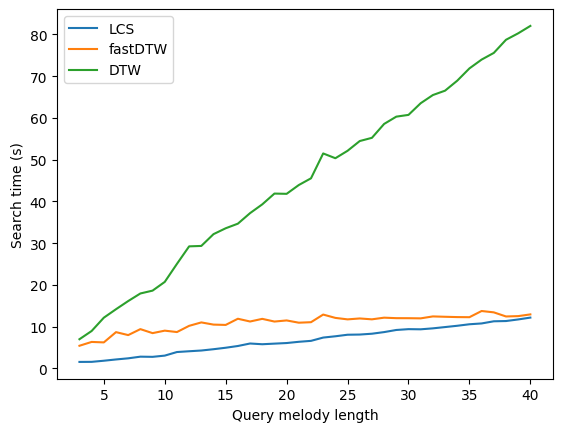

In [44]:
df = pd.read_csv('results.csv')
print(df)
# plt.plot(pd['lcs_time'])
plt.plot(df['input_len'], df['lcs_time'], label='LCS')
plt.plot(df['input_len'], df['fast_dtw_time'], label='fastDTW')
plt.plot(df['input_len'], df['dtw_time'], label='DTW')
plt.ylabel("Search time (s)")
plt.xlabel("Query melody length")
plt.legend()
plt.savefig('./query_len.png')
plt.show()

In [45]:
constant = 0

for i in range(0, 38):
    constant += df['dtw_time'][i] / df['lcs_time'][i]

constant = constant / len(df['lcs_time'])
print(constant)

6.618046380713008
